In [194]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import preprocessing
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
car_purchasing_df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Tasks\\Task 4-1\\car_purchasing.csv",
                   encoding='ISO-8859-1')
car_purchasing_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [128]:
car_purchasing_df.shape

(500, 9)

#### Understanding the Data

In [129]:
car_purchasing_df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [130]:
car_purchasing_df[car_purchasing_df.duplicated()]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount


In [131]:
car_purchasing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [132]:
car_purchasing_df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [133]:
# unique values in each column
for columns in car_purchasing_df.columns:
    print(f'Column: {columns}')
    print(car_purchasing_df[columns].unique())
    print("------------------------------")

Column: customer name
['Martina Avila' 'Harlan Barnes' 'Naomi Rodriquez' 'Jade Cunningham'
 'Cedric Leach' 'Carla Hester' 'Griffin Rivera' 'Orli Casey'
 'Marny Obrien' 'Rhonda Chavez' 'Jerome Rowe' 'Akeem Gibson' 'Quin Smith'
 'Tatum Moon' 'Sharon Sharpe' 'Thomas Williams' 'Blaine Bender'
 'Stephen Lindsey' 'Sloane Mann' 'Athena Wolf' 'Blythe Romero'
 'Zelenia Byers' 'Nola Wiggins' 'Micah Wheeler' 'Caryn Hendrix'
 'Hedda Miranda' 'Ulric Lynn' 'Alma Pope' 'Gemma Hendrix' 'Castor Wood'
 'Herman Stevenson' 'Adrienne Bolton' 'Dahlia Cleveland' 'Keane Browning'
 'Quon Hull' 'Coby Charles' 'Amery Cortez' 'Uriel Bradshaw'
 'Fredericka Sanders' 'Christopher Stevens' 'Rachel Ashley' 'Lael Wright'
 'Ryder Shaffer' 'Eric Noel' 'Tamara Guy' 'Quincy Bell' 'Lee Taylor'
 'Kenneth Pope' 'Reese Vance' 'Quon Carroll' 'Magee Davidson'
 'Leilani Gross' 'Morgan William' 'Francesca Cervantes' 'Rafael Peterson'
 'Roanna Knox' 'Marny Vargas' 'Charlotte Waller' 'Dorian Hernandez'
 'Armando Hensley' 'Rowan Kidd

In [134]:
# duplicate values in each columns
for columns in car_purchasing_df.select_dtypes('O'):
    print(f'Column: {columns}')
    print(car_purchasing_df[columns].duplicated().sum())
    print("---------------------------------")

Column: customer name
2
---------------------------------
Column: customer e-mail
0
---------------------------------
Column: country
289
---------------------------------


#### Data Cleaning

In [135]:
# Drop non-essentail columns 
car_purchasing_df.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)

#### Data Exploration

In [136]:
car_purchasing_df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


#### Exploratory Data Analysis

#### Univariate Anaysis

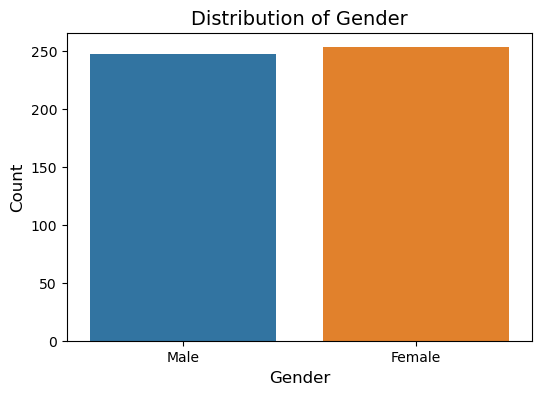

In [137]:
# Gender
plt.figure(figsize = (6, 4))
sb.countplot(data = car_purchasing_df, x = 'gender')

plt.title('Distribution of Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks([0, 1],['Male', 'Female'])

plt.show()

In [138]:
# Age
fig = px.histogram(car_purchasing_df, x = 'age', title = "Distribution of Age")

fig.update_layout(
    xaxis_title = ('Age'),
    yaxis_title= ('Count'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

In [139]:
# annual Salary
fig = px.histogram(car_purchasing_df, x = 'annual Salary', title = "Distribution of Annual Salary")

fig.update_layout(
    xaxis_title = ('Annual Salary'),
    yaxis_title= ('Count'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

In [140]:
# credit card debt
fig = px.histogram(car_purchasing_df, x = 'credit card debt', title = "Distribution of Credit Card Debt")

fig.update_layout(
    xaxis_title = ('Credit Card Debt'),
    yaxis_title= ('Count'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

In [141]:
# net worth
fig = px.histogram(car_purchasing_df, x = 'net worth', title = "Distribution of Net worth")

fig.update_layout(
    xaxis_title = ('Net worth'),
    yaxis_title= ('Count'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

In [142]:
# car purchase amount
fig = px.histogram(car_purchasing_df, x = 'car purchase amount', title = "Distribution of Car purchase amount")

fig.update_layout(
    xaxis_title = ('car purchase amount'),
    yaxis_title= ('Count'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

In [143]:
fig = px.histogram(car_purchasing_df, x = 'gender', y = 'car purchase amount',
                   title = "Sum of Car purchase amount with respect to gender")

fig.update_layout(
    xaxis_title = ('Country'),
    yaxis_title= ('Car purchase amount'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

In [144]:
car_purchasing_df.columns

Index(['gender', 'age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [145]:
fig = px.histogram(car_purchasing_df, x = 'net worth', y = 'car purchase amount',
                   title = "Sum of Car purchase amount vs. net worth")

fig.update_layout(
    xaxis_title = ('Net worth'),
    yaxis_title= ('Car purchase amount'),
    bargap = 0.05,
    showlegend = False,
)
fig.show()

#### Data preprocessing

#### 1. Feature Engineering

In [146]:
car_purchasing_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


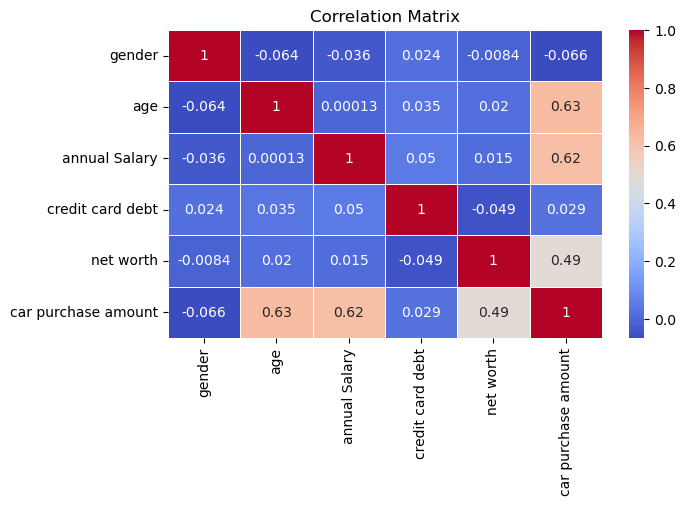

In [147]:
plt.figure(figsize = (7, 4))
sb.heatmap(car_purchasing_df.corr(), annot = True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [180]:
X = car_purchasing_df.drop(['car purchase amount', 'gender'],axis= 1)
y = car_purchasing_df['car purchase amount']

In [181]:
X.shape

(500, 4)

#### 2. Splitting into training and testing

In [182]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


In [184]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999816626624
Test score 0.9999999793157544


In [201]:
model = keras.Sequential([
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 35ms/step - loss: 0.3063 - mean_absolute_error: 0.5339 - val_loss: 0.2890 - val_mean_absolute_error: 0.5142
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2410 - mean_absolute_error: 0.4695 - val_loss: 0.2363 - val_mean_absolute_error: 0.4610
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1957 - mean_absolute_error: 0.4192 - val_loss: 0.1874 - val_mean_absolute_error: 0.4062
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1483 - mean_absolute_error: 0.3609 - val_loss: 0.1364 - val_mean_absolute_error: 0.3398
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0994 - mean_absolute_error: 0.2880 - val_loss: 0.0821 - val_mean_absolute_error: 0.2518
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.1992 - val_loss: 0.0385 - val_mean_absolute_error: 0.1607
Epoch 7/100
10/10 [==

Epoch 98/100
10/10 [==============================] - 0s 8ms/step - loss: 2.3207e-05 - mean_absolute_error: 0.0031 - val_loss: 1.4137e-04 - val_mean_absolute_error: 0.0057
Epoch 99/100
10/10 [==============================] - 0s 7ms/step - loss: 2.3249e-05 - mean_absolute_error: 0.0032 - val_loss: 1.3419e-04 - val_mean_absolute_error: 0.0057
Epoch 100/100
10/10 [==============================] - 0s 7ms/step - loss: 2.2375e-05 - mean_absolute_error: 0.0030 - val_loss: 1.3878e-04 - val_mean_absolute_error: 0.0057


In [202]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 26)                130       
                                                                 
 dense_66 (Dense)            (None, 16)                432       
                                                                 
 dense_67 (Dense)            (None, 10)                170       
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 743
Trainable params: 743
Non-trainable params: 0
_________________________________________________________________


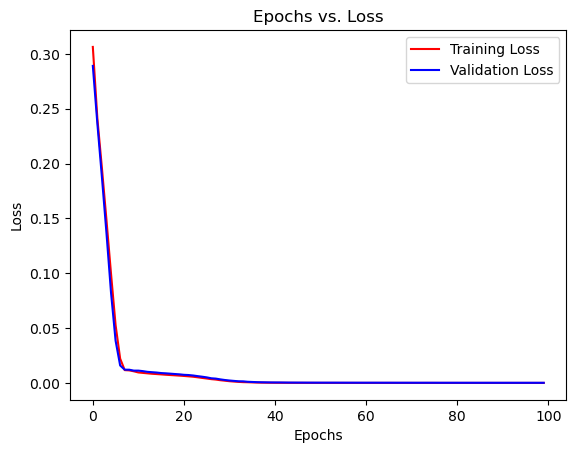

In [203]:
plt.plot(history.history['loss'], label='Training Loss' , color='red')
plt.plot(history.history['val_loss'], label='Validation Loss' , color='blue')
plt.title('Epochs vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [204]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.8765e-05 - mean_absolute_error: 0.0038


[3.876473419950344e-05, 0.003828618908300996]

In [205]:
yp = model.predict(X_test)
yp[:5]

4/4 [==============================] - 0s 6ms/step


array([[0.42112046],
       [0.48782733],
       [0.28705937],
       [0.60851663],
       [0.41286948]], dtype=float32)

In [206]:
# Calculate MAE
mae = mean_absolute_error(y_test, yp)

# Calculate MSE
mse = mean_squared_error(y_test, yp)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, yp)

# Print the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Absolute Error: 0.003828619580365209
Mean Squared Error: 3.8764750530322844e-05
Root Mean Squared Error: 0.006226134477372204
R-squared: 0.9983775525810825
